# No. 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mengambil data dari file JSON
data_url = "https://gist.githubusercontent.com/nadirbslmh/8fc9cc6cd5cbaaf5cbff63b090fb497e/raw/a7bf3e1edab88b04314a40a9de3ed744bc86d0e9/ecommerce.json"
data = pd.read_json(data_url)
df = pd.DataFrame(data)
df

,transaction_id,transaction_date,customer_name,transaction_amount,item_category,item_name,payment_method,status
0,1,01-11-2023,John Doe,50.0,book,The Great Gatsby,credit card,success
1,2,01-11-2023,Jane Smith,120.5,gaming,PlayStation 5,cash,success
2,3,02-11-2023,Bob Johnson,800.0,technology,Laptop,credit card,failed
3,4,03-11-2023,Alice Williams,30.0,kitchen,Coffee Maker,e wallet,success
4,5,03-11-2023,Charlie Brown,150.0,book,To Kill a Mockingbird,credit card,success
...,...,...,...,...,...,...,...,...
95,96,21-12-2023,Oliver Brown,15.0,kitchen,Peeler,credit card,success
96,97,21-12-2023,Chloe Wilson,75.5,book,The Road,credit card,success
97,98,22-12-2023,Ella Harris,30.0,gaming,Board Game: Monopoly,cash,success
98,99,22-12-2023,Liam Turner,180.0,technology,Bluetooth Earbuds,e wallet,success


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   transaction_id      100 non-null    int64  
 1   transaction_date    100 non-null    object 
 2   customer_name       100 non-null    object 
 3   transaction_amount  100 non-null    float64
 4   item_category       100 non-null    object 
 5   item_name           100 non-null    object 
 6   payment_method      100 non-null    object 
 7   status              100 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 6.4+ KB


In [4]:
df.drop_duplicates()

,transaction_id,transaction_date,customer_name,transaction_amount,item_category,item_name,payment_method,status
0,1,01-11-2023,John Doe,50.0,book,The Great Gatsby,credit card,success
1,2,01-11-2023,Jane Smith,120.5,gaming,PlayStation 5,cash,success
2,3,02-11-2023,Bob Johnson,800.0,technology,Laptop,credit card,failed
3,4,03-11-2023,Alice Williams,30.0,kitchen,Coffee Maker,e wallet,success
4,5,03-11-2023,Charlie Brown,150.0,book,To Kill a Mockingbird,credit card,success
...,...,...,...,...,...,...,...,...
95,96,21-12-2023,Oliver Brown,15.0,kitchen,Peeler,credit card,success
96,97,21-12-2023,Chloe Wilson,75.5,book,The Road,credit card,success
97,98,22-12-2023,Ella Harris,30.0,gaming,Board Game: Monopoly,cash,success
98,99,22-12-2023,Liam Turner,180.0,technology,Bluetooth Earbuds,e wallet,success


## a. Jumlah Nilai Transaksi Perhari

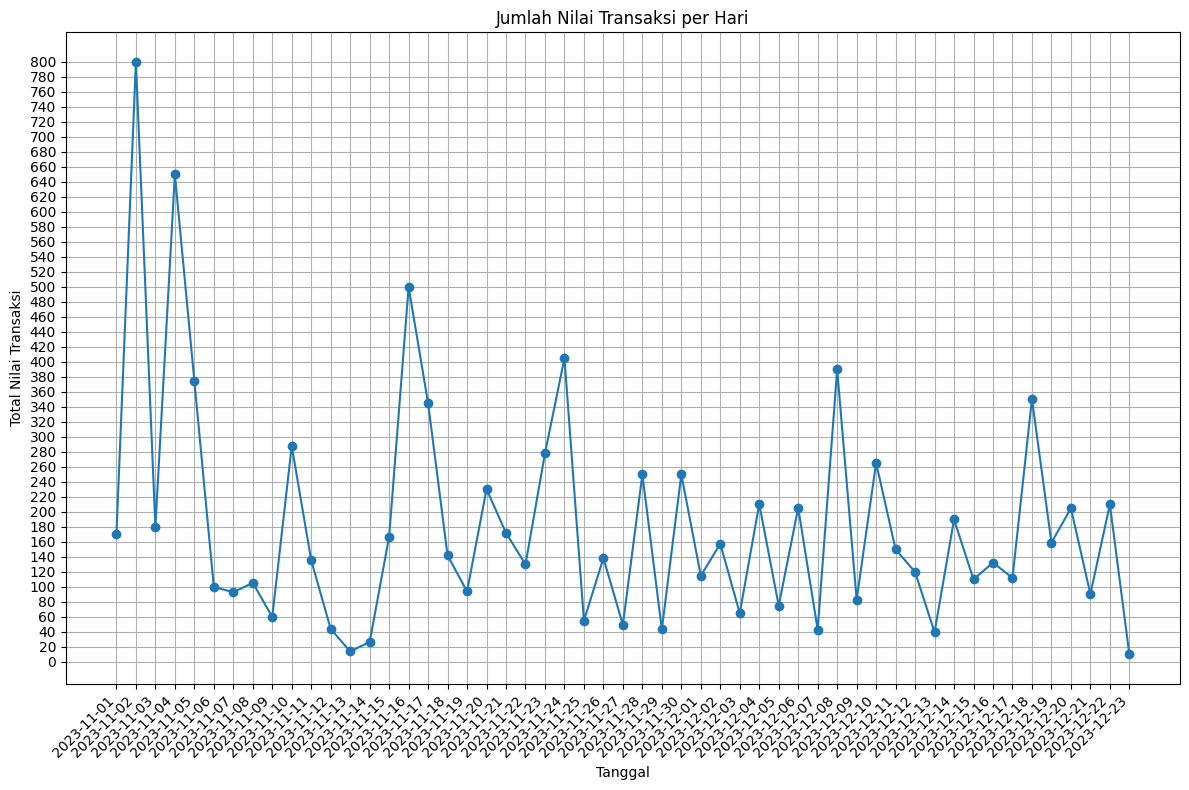

In [11]:
# Pra-pemrosesan data
df['transaction_date'] = pd.to_datetime(df['transaction_date'], format='%d-%m-%Y')

plt.figure(figsize=(12, 8))
total_harian = df.groupby(df['transaction_date'].dt.floor('D'))['transaction_amount'].sum()
plt.plot(total_harian, marker='o')
plt.title('Jumlah Nilai Transaksi per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Total Nilai Transaksi')

# Atur penanda sumbu-x dan label harian
plt.xticks(total_harian.index, rotation=45, ha='right')

# Atur jarak pada label sumbu y menjadi 20
plt.yticks(range(0, int(total_harian.max())+20, 20))

plt.grid(True)
plt.tight_layout()
plt.show()

## b. Kategori Barang yang paling banyak dibeli

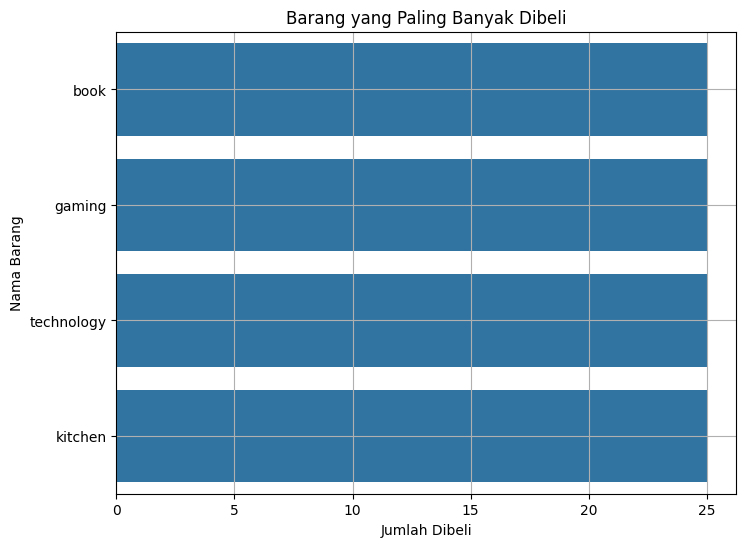

In [14]:
# Visualisasi jenis roti yang paling banyak dipesan
plt.figure(figsize=(8, 6))
sns.countplot(y='item_category', data=df, order=df['item_category'].value_counts().index)
plt.title('Barang yang Paling Banyak Dibeli')
plt.xlabel('Jumlah Dibeli')
plt.ylabel('Nama Barang')
plt.grid(True)
plt.show()

## c. Jumlah nilai transaksi dengan metode pembayaran e-wallet.

In [15]:
# Filter transaksi dengan metode pembayaran e-wallet
ewallet_transactions = df[df['payment_method'] == 'e wallet']

# Menghitung jumlah nilai transaksi dengan metode pembayaran e-wallet
total_ewallet_transaction = ewallet_transactions['transaction_amount'].sum()

print("Total nilai transaksi dengan metode pembayaran e-wallet:", total_ewallet_transaction)

Total nilai transaksi dengan metode pembayaran e-wallet: 3950.5


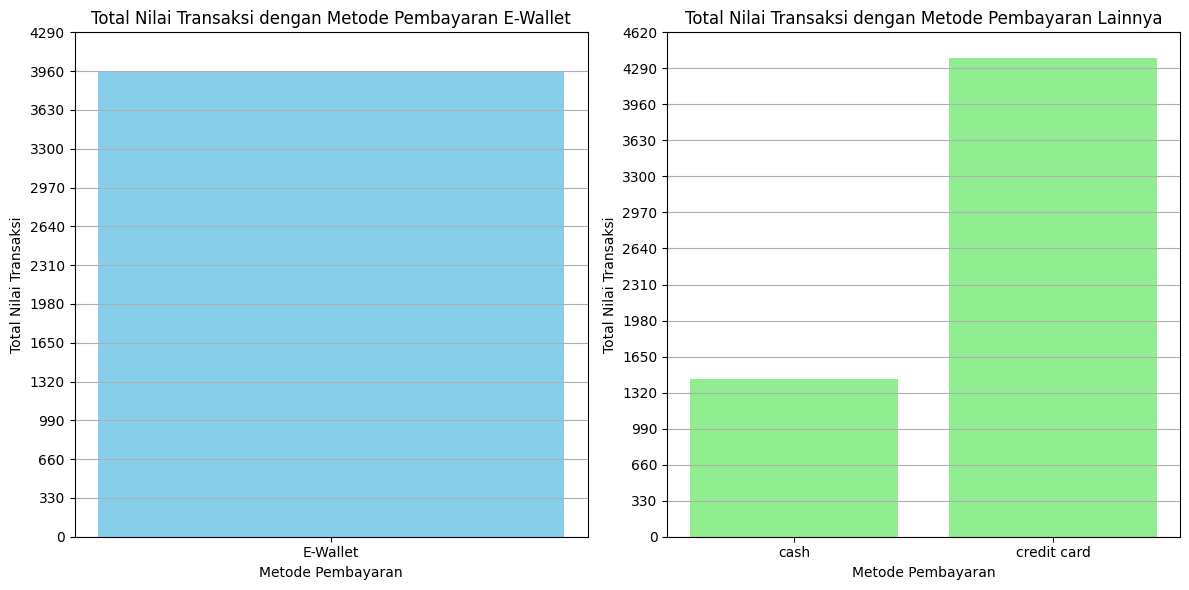

In [38]:
# Menghitung jumlah total nilai transaksi untuk semua metode pembayaran
total_transaction_by_method = df.groupby('payment_method')['transaction_amount'].sum()

# Membuat subplots dengan ukuran tetap (1, 2)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Bar plot untuk metode pembayaran e-wallet
axs[0].bar("E-Wallet", total_ewallet_transaction, color='skyblue')
axs[0].set_title('Total Nilai Transaksi dengan Metode Pembayaran E-Wallet')
axs[0].set_xlabel('Metode Pembayaran')
axs[0].set_ylabel('Total Nilai Transaksi')
axs[0].set_yticks(range(0, int(total_ewallet_transaction.max())+500, 330))
axs[0].grid(axis='y')

# Bar plot untuk metode pembayaran lainnya
other_methods = total_transaction_by_method.drop('e wallet')
axs[1].bar(other_methods.index, other_methods.values, color='lightgreen')
axs[1].set_title('Total Nilai Transaksi dengan Metode Pembayaran Lainnya')
axs[1].set_xlabel('Metode Pembayaran')
axs[1].set_ylabel('Total Nilai Transaksi')
axs[1].set_yticks(range(0, int(other_methods.max())+500, 330))
axs[1].grid(axis='y')

plt.tight_layout()
plt.show()

## d. Nilai maksimal, nilai minimal dan nilai tengah dari jumlah nilai transaksi yang dilakukan.

In [39]:
# Nilai maksimal dari jumlah nilai transaksi
nilai_maksimal = df['transaction_amount'].max()

# Nilai minimal dari jumlah nilai transaksi
nilai_minimal = df['transaction_amount'].min()

# Nilai tengah dari jumlah nilai transaksi
nilai_tengah = df['transaction_amount'].median()

print("Nilai maksimal:", nilai_maksimal)
print("Nilai minimal:", nilai_minimal)
print("Nilai tengah:", nilai_tengah)

Nilai maksimal: 800.0
Nilai minimal: 5.0
Nilai tengah: 47.5


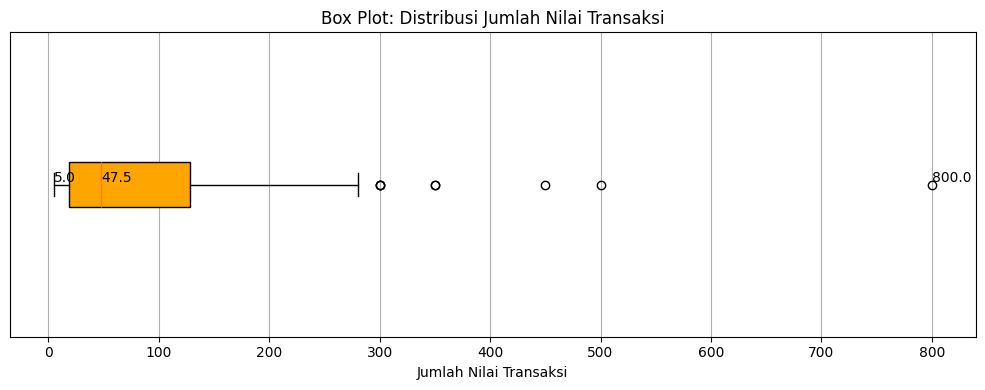

In [62]:
# Visualisasi menggunakan box plot
plt.figure(figsize=(10, 4))
plt.boxplot(df['transaction_amount'], vert=False, patch_artist=True, boxprops=dict(facecolor='orange'))
plt.title('Box Plot: Distribusi Jumlah Nilai Transaksi')
plt.xlabel('Jumlah Nilai Transaksi')
plt.yticks([])
plt.grid(True)

# Menambahkan teks untuk nilai maksimal, minimal, dan tengah
plt.text(nilai_maksimal, 1, f'{nilai_maksimal}', verticalalignment='bottom')
plt.text(nilai_minimal, 1, f'{nilai_minimal}', verticalalignment='bottom')
plt.text(nilai_tengah, 1, f'{nilai_tengah}', verticalalignment='bottom')

plt.tight_layout()
plt.show()

# No. 2

## a. Persentase responden berdasarkan umur

## b. Bahasa pemrograman / framework yang paling banyak digunakan dalam pengembangan front end.

## c. Bahasa pemrograman / framework yang paling banyak digunakan dalam pengembangan back end.

## d. Persentase bahasa pemrograman / framework yang dipilih dalam pengembangan front end.

## e. Rentangan gaji per tahun yang paling banyak berdasarkan hasil survei.